In [1]:
import pymc as pm, polars as pl
import matplotlib.pyplot as plt, numpy as np, xarray as xr
import arviz as az

array([[<Axes: ylabel='Y'>, <Axes: >],
       [<Axes: xlabel='X', ylabel='Z'>, <Axes: xlabel='Y'>]], dtype=object)

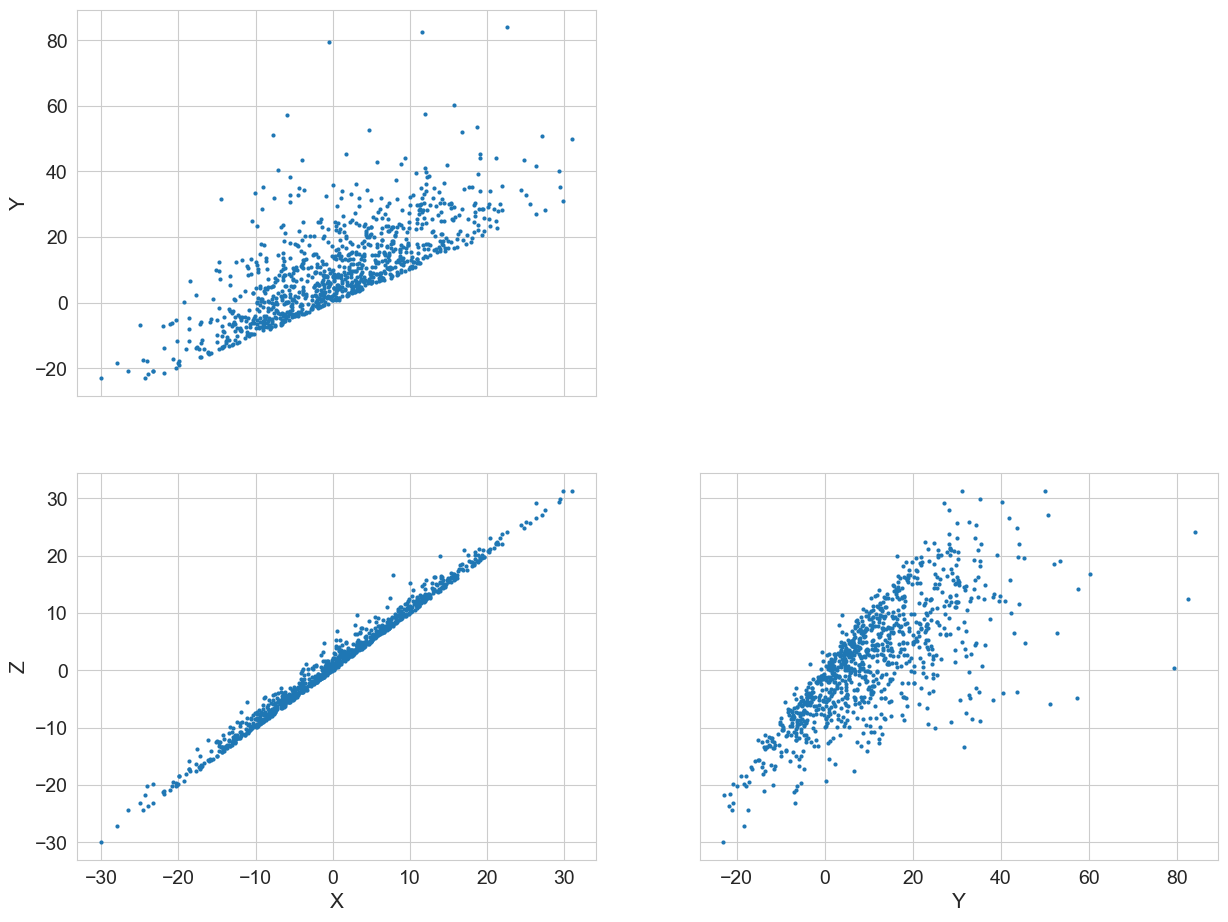

In [6]:
X = np.random.normal(0,10, 1000)
Y = X + np.random.exponential(scale=10,size=1000)

Z = X + np.random.exponential(scale=1,size=1000)
az.plot_pair(data={'X': X, 'Y': Y, "Z": Z})

In [21]:
# model definition
with pm.Model() as basic_model:
    # priors
    alpha = pm.Normal('alpha', 0, 5)
    beta = pm.Normal('beta', 0, 1)
    beta2 = pm.Normal('beta2', 0, 1)
    sigma = pm.Exponential('sigma', 2)

    mu = alpha + beta*X + beta2*Y
    z = pm.Normal('z', mu, sigma, observed=Z)

    # check prior predictive
    idata = pm.sample_prior_predictive(draws=100)

Sampling: [alpha, beta, beta2, sigma, z]


Text(0.5, 1.0, 'Prior predictive checks -- Weakly regularizing priors')

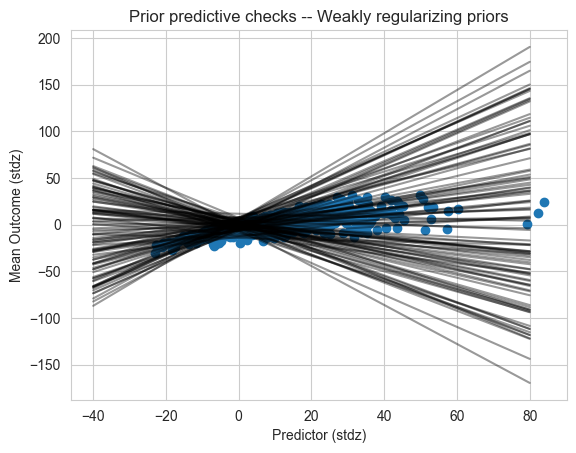

In [22]:
_, ax = plt.subplots()

x = xr.DataArray(np.linspace(-40, 80, 70), dims=["plot_dim"])
prior = idata.prior
y = prior["alpha"] + prior["beta"] * x

ax.plot(x, y.stack(sample=("chain", "draw")), c="k", alpha=0.4)
ax.scatter(Y, Z)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Mean Outcome (stdz)")
ax.set_title("Prior predictive checks -- Weakly regularizing priors")

In [23]:
with basic_model:
    idata_posterior = pm.sample(draws=1000)

idata_posterior

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, beta2, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

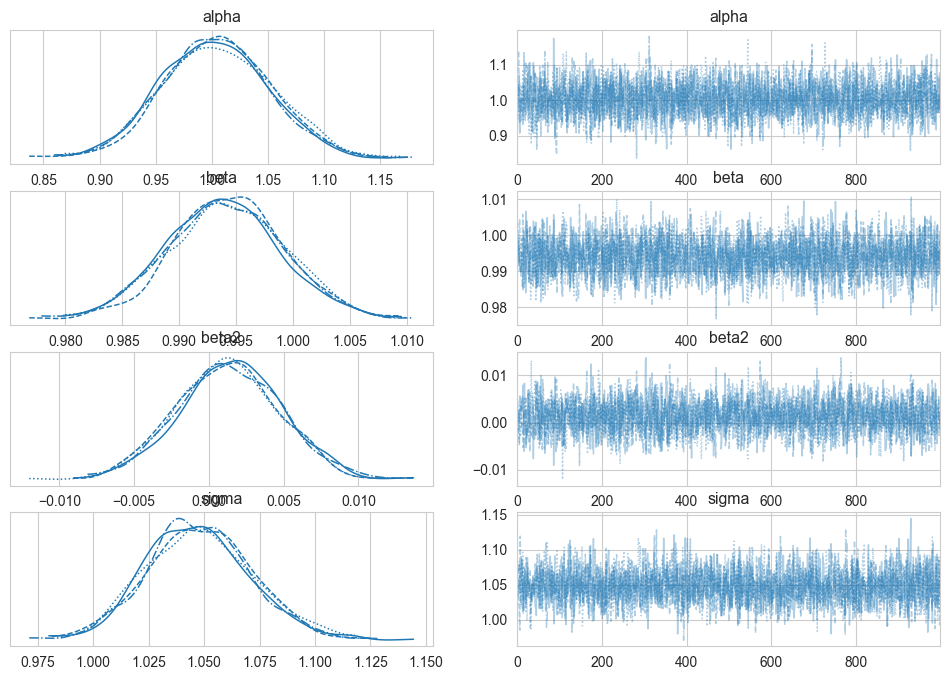

In [25]:
az.plot_trace(idata_posterior["posterior"])